In [1]:
# Libraries

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from pandas import Series

## Data from contralacorrupcion.mx

In [2]:
# Reading the dataset
covid19 = pd.read_csv("actas-defuncion-covid-19-cdmx1.csv",parse_dates=['FECHA'], index_col = "FECHA")
covid19.head()

,EDAD,SEMANA,MES,RAZON,ACTA
FECHA,,,,,
2020-03-18,41 AÑOS,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
2020-03-23,61 AÑOS,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2020-03-26,60 AÑOS,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
2020-03-26,37 AÑOS,13,3,NEUMONIA POR CORONAVIRUS,7879
2020-03-26,63 AÑOS,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [3]:
number_by_date = covid19.drop(['EDAD', 'SEMANA', 'MES', 'RAZON', 'ACTA'], axis=1)
number_by_date

""
FECHA
2020-03-18
2020-03-23
2020-03-26
2020-03-26
2020-03-26
...
2020-05-12
2020-05-12
2020-05-12


In [4]:
number_by_date['MUERTES'] = 0

In [5]:
number_by_date

,MUERTES
FECHA,
2020-03-18,0
2020-03-23,0
2020-03-26,0
2020-03-26,0
2020-03-26,0
...,...
2020-05-12,0
2020-05-12,0
2020-05-12,0


In [6]:
number_by_date.drop(number_by_date.head(2).index, inplace=True)

In [7]:
number_by_date = number_by_date.groupby('FECHA').count()
number_by_date.head()

,MUERTES
FECHA,
2020-03-26,3
2020-03-27,2
2020-03-28,1
2020-03-29,2
2020-03-30,3


In [37]:
"""
plt.subplot(211)
plt.plot(number_by_date)
plt.xlabel("Fecha")
plt.ylabel("Muertes")
plt.show()
"""

'\nplt.subplot(211)\nplt.plot(number_by_date)\nplt.xlabel("Fecha")\nplt.ylabel("Muertes")\nplt.show()\n'

## Data from gob.mx

In [9]:
covid19_oficial = pd.read_csv("200521COVID19MEXICO.csv", sep = ",",parse_dates = ["FECHA_DEF"], encoding ='latin1')
covid19_oficial.head(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,...,2,2,2,2,99,1,99,MÃ©xico,99,1
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
5,2020-05-21,1d2dfb,2,4,25,2,14,25,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
6,2020-05-21,1b3e2b,2,4,9,2,7,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
7,2020-05-21,0c0eef,2,4,21,1,21,21,114,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
8,2020-05-21,043ea2,2,4,27,2,27,27,4,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
9,2020-05-21,0bd39a,2,4,8,1,8,8,17,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [10]:
temp = covid19_oficial[['FECHA_DEF']]

In [11]:
temp = temp.set_index('FECHA_DEF')

In [12]:
temp['MUERTES'] = 0

In [13]:
covid19_gobierno = temp.groupby('FECHA_DEF').count()

In [14]:
covid19_gobierno.head()

,MUERTES
FECHA_DEF,
2020-01-14,1
2020-01-15,1
2020-01-29,1
2020-02-10,1
2020-02-20,1


In [15]:
covid19_gobierno.drop(covid19_gobierno.tail(1).index, inplace=True)

In [16]:
temp = covid19_gobierno

In [17]:
temp = temp.reset_index()

In [18]:
temp = temp.loc[(temp['FECHA_DEF'] >= '2020-03-26') &  (temp['FECHA_DEF'] <= '2020-05-12')]

In [19]:
temp = temp.set_index('FECHA_DEF')

In [20]:
print(temp.head(1))
print(temp.tail(1))

            MUERTES
FECHA_DEF          
2020-03-26       16
            MUERTES
FECHA_DEF          
2020-05-12      283


In [21]:
temp = temp.reset_index()
temp['FECHA_DEF'] = pd.to_datetime(temp['FECHA_DEF'])

In [22]:
temp = temp.set_index('FECHA_DEF')

## Visualization

In [32]:
sns.set(rc={'figure.figsize':(11, 4)})

In [33]:
start, end = '2020-03', '2020-05'

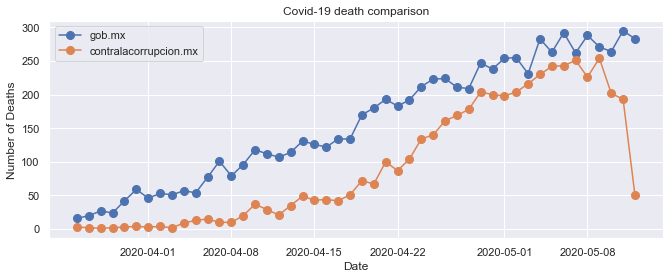

In [41]:
fig, ax = plt.subplots()
ax.plot(temp.loc[start:end],
marker='o', markersize=8, linestyle='-', label='gob.mx')
ax.plot(number_by_date.loc[start:end],
marker='o', markersize=8, linestyle='-', label='contralacorrupcion.mx')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.set_title('Covid-19 death comparison')
ax.legend()